In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import random

In [3]:
df = pd.read_csv("test_predicted.csv")
loan_data=df[[
    "LoanAmount",
    "InterestRate",
    "LoanTerm","LoanPurpose","DefaultProbability"]]
df.head(10)
loan_data.head(10)

,LoanAmount,InterestRate,LoanTerm,LoanPurpose,DefaultProbability
0,43797,6.10,24,Other,0.169157
1,18402,12.99,60,Business,0.067436
2,151774,5.51,48,Other,0.073382
3,55789,23.93,36,Business,0.433869
4,189798,22.05,48,Auto,0.252992
5,196031,19.75,60,Education,0.164508
6,32179,6.45,24,Education,0.088060
7,101882,12.82,12,Business,0.145396
8,11560,22.84,36,Other,0.213354
9,172152,13.28,12,Other,0.206757


In [4]:
def monthly_payment(P, annual_rate, months):
    r_m = annual_rate / 12
    n=months
    # Amortized loan formula
    M = P * (r_m * (1 + r_m) ** n) / ((1 + r_m) ** n - 1)
    return M


In [5]:
def Future_value(monthly_payments, months):
    return monthly_payments*months

In [6]:
loan_data['MonthlyPayment'] = 0.0
loan_data['FutureValue']=0.0

for i in range(loan_data.shape[0]):
    principal = loan_data.loc[i, "LoanAmount"]
    annual_rate = loan_data.loc[i, "InterestRate"]/100
    months = loan_data.loc[i, "LoanTerm"]
    loan_data.loc[i, "MonthlyPayment"] = monthly_payment(principal, annual_rate, months)
    loan_data.loc[i,'FutureValue']= Future_value(loan_data.loc[i, "MonthlyPayment"], months)
loan_data.head(10)

C:\Users\thanh\AppData\Local\Temp\ipykernel_18744\1536764622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['MonthlyPayment'] = 0.0
C:\Users\thanh\AppData\Local\Temp\ipykernel_18744\1536764622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['FutureValue']=0.0


,LoanAmount,InterestRate,LoanTerm,LoanPurpose,DefaultProbability,MonthlyPayment,FutureValue
0,43797,6.10,24,Other,0.169157,1943.083842,46634.012209
1,18402,12.99,60,Business,0.067436,418.607855,25116.471272
2,151774,5.51,48,Other,0.073382,3530.420002,169460.160086
3,55789,23.93,36,Business,0.433869,2186.711676,78721.620332
4,189798,22.05,48,Auto,0.252992,5984.943769,287277.300894
5,196031,19.75,60,Education,0.164508,5166.391522,309983.491309
6,32179,6.45,24,Education,0.088060,1432.726740,34385.441754
7,101882,12.82,12,Business,0.145396,9091.221020,109094.652237
8,11560,22.84,36,Other,0.213354,446.520936,16074.753686
9,172152,13.28,12,Other,0.206757,15398.771735,184785.260817


In [7]:
loan_data['Loan_end_boolean'] = np.zeros(loan_data.shape[0], dtype=bool)
loan_data.head(10)

C:\Users\thanh\AppData\Local\Temp\ipykernel_18744\544357364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['Loan_end_boolean'] = np.zeros(loan_data.shape[0], dtype=bool)


,LoanAmount,InterestRate,LoanTerm,LoanPurpose,DefaultProbability,MonthlyPayment,FutureValue,Loan_end_boolean
0,43797,6.10,24,Other,0.169157,1943.083842,46634.012209,False
1,18402,12.99,60,Business,0.067436,418.607855,25116.471272,False
2,151774,5.51,48,Other,0.073382,3530.420002,169460.160086,False
3,55789,23.93,36,Business,0.433869,2186.711676,78721.620332,False
4,189798,22.05,48,Auto,0.252992,5984.943769,287277.300894,False
5,196031,19.75,60,Education,0.164508,5166.391522,309983.491309,False
6,32179,6.45,24,Education,0.088060,1432.726740,34385.441754,False
7,101882,12.82,12,Business,0.145396,9091.221020,109094.652237,False
8,11560,22.84,36,Other,0.213354,446.520936,16074.753686,False
9,172152,13.28,12,Other,0.206757,15398.771735,184785.260817,False


In [9]:
loan_data=loan_data[["LoanTerm","LoanPurpose","MonthlyPayment","FutureValue", "Loan_end_boolean"]]
loan_data["PD0"]=df["DefaultProbability"]
loan_test = pd.DataFrame({
    "LoanTerm": [24, 36, 60, 24],
    "LoanPurpose": ["Business", "Personal", "Business", "Education"],
    "MonthlyPayment": [2000, 500, 1500, 800],
    "FutureValue": [80000, 25000, 50000, 30000],
    "PD0": [0.15, 0.08, 0.10, 0.25],
    "Loan_end_boolean": False
})


In [10]:
#Simulation setup

In [11]:
def calculate_pd_matrix(loan_data, rate, max_term):
    """Vectorized PD calculation using your specified formula"""
    is_business = (loan_data["LoanPurpose"] == "Business").values
    pd0 = loan_data["PD0"].values
    loan_terms = loan_data["LoanTerm"].values
    
    # Create time grid [max_term x n_loans]
    t = np.arange(max_term)[:, np.newaxis]
    active_mask = t < loan_terms  # [max_term x n_loans]
    
    # Initialize PD matrix
    pd_matrix = np.zeros((max_term, len(loan_data)))
    
    # Business loans: PD grows to 1
    business_mask = active_mask & is_business
    exponent_biz = -rate * t
    pd_matrix[business_mask] = 1 / (1 + (1/pd0 - 1) * np.exp(exponent_biz))[business_mask]
    
    # Non-business loans: PD decays to 0
    non_biz_mask = active_mask & ~is_business
    exponent_non_biz = rate * t
    pd_matrix[non_biz_mask] = 1 / (1 + (1/pd0 - 1) * np.exp(exponent_non_biz))[non_biz_mask]
    
    return pd_matrix

In [12]:
def simulate_cashflows(data, rate=0.1, recovery_rate=0.2, 
                      default_events=None, rng=None):
    loan_data=data.copy()
    if rng is None:
        rng = np.random.default_rng()
    
    max_term = loan_data["LoanTerm"].max()
    cashflow_matrix = np.zeros((max_term, len(loan_data)))
    loan_ended = loan_data["Loan_end_boolean"].values.copy()
    pd_matrix = calculate_pd_matrix(loan_data, rate, max_term)
    
    # Convert default_events to dictionary for quick lookup
    event_dict = dict(default_events) if default_events else {}

    for t in range(max_term):
        active_mask = (~loan_ended) & (t < loan_data["LoanTerm"].values)
        active_idx = np.where(active_mask)[0]
        current_pd = pd_matrix[t, active_idx]
        sum_pd = current_pd.sum()
        # Get default count for this t (0 if not specified)
        n_defaults = event_dict.get(t, 0)
        n_defaults = min(n_defaults, len(active_idx))  # Can't exceed active loans
        
        if n_defaults > 0 and sum_pd > 1e-8:
            # PD-weighted selection
            weights = current_pd / sum_pd
            weights /= weights.sum()  # Ensure exact sum=1
            chosen = rng.choice(active_idx, size=int(n_defaults), replace=False, p=weights)
            # Calculate recovery
            fv = loan_data["FutureValue"].values[chosen]
            pmt = loan_data["MonthlyPayment"].values[chosen]
            cashflow_matrix[t, chosen] = (fv - (t)*pmt) * recovery_rate
            loan_ended[chosen] = True
            # Regular payments for non-defaults
            non_default = np.setdiff1d(active_idx, chosen)
            cashflow_matrix[t, non_default] = loan_data["MonthlyPayment"].values[non_default]
        else:
            cashflow_matrix[t, active_idx] = loan_data["MonthlyPayment"].values[active_idx]
    loan_data["Loan_end_boolean"] = loan_ended
    return cashflow_matrix,pd_matrix

In [33]:
def default_schedule_generation(loan_data,num_default_times, total_percent, 
                               peak_center=24, peak_std=12, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    max_term = loan_data["LoanTerm"].max()
    # Generate default times with normal distribution
    times = []
    while len(times) < num_default_times:
        new_times = rng.normal(loc=peak_center, scale=peak_std, 
                             size=num_default_times - len(times))
        new_times = np.clip(np.round(new_times), 1, max_term).astype(int)
        times = list(np.unique(np.concatenate([times, new_times])))
    
    # Assign percentages using Dirichlet distribution
    proportions = rng.dirichlet(np.ones(num_default_times))
    percentages = proportions * total_percent
    people_default_num=(percentages/100)*loan_data.shape[0]
    for i in range(len(people_default_num)):
        people_default_num[i]=int(people_default_num[i])-1
    return sorted(zip(times, people_default_num), key=lambda x: x[0])


In [34]:
# Run simulation
#no defaults, ideal case
results_no_defaults,pd_matrix = simulate_cashflows(
    data,
    rate=0.15,
    recovery_rate=0.3,
)
no_default_data=np.sum(results_no_defaults, axis=1)
no_default_data

array([6.14964813e+08, 6.14964813e+08, 6.14964813e+08, 6.14964813e+08,
       6.14964813e+08, 6.14964813e+08, 6.14964813e+08, 6.14964813e+08,
       6.14964813e+08, 6.14964813e+08, 6.14964813e+08, 6.14964813e+08,
       3.70188373e+08, 3.70188373e+08, 3.70188373e+08, 3.70188373e+08,
       3.70188373e+08, 3.70188373e+08, 3.70188373e+08, 3.70188373e+08,
       3.70188373e+08, 3.70188373e+08, 3.70188373e+08, 3.70188373e+08,
       2.37288084e+08, 2.37288084e+08, 2.37288084e+08, 2.37288084e+08,
       2.37288084e+08, 2.37288084e+08, 2.37288084e+08, 2.37288084e+08,
       2.37288084e+08, 2.37288084e+08, 2.37288084e+08, 2.37288084e+08,
       1.42064604e+08, 1.42064604e+08, 1.42064604e+08, 1.42064604e+08,
       1.42064604e+08, 1.42064604e+08, 1.42064604e+08, 1.42064604e+08,
       1.42064604e+08, 1.42064604e+08, 1.42064604e+08, 1.42064604e+08,
       6.47439072e+07, 6.47439072e+07, 6.47439072e+07, 6.47439072e+07,
       6.47439072e+07, 6.47439072e+07, 6.47439072e+07, 6.47439072e+07,
      

In [44]:
# 3% of portfolio defaults at random number of time
default_schedule_rand_3=default_schedule_generation(loan_data,random.randint(1,int(100/3)),3)
results_3,pd_matrix = simulate_cashflows(
    loan_data,
    rate=0.15,
    recovery_rate=0.3,
    default_events=default_schedule_rand_3
)
print(default_schedule_rand_3)
data_3=np.sum(results_3, axis=1)
print(data_3)

[(1.0, 136.0), (3.0, 189.0), (4.0, 28.0), (8.0, 129.0), (9.0, 234.0), (10.0, 95.0), (11.0, 191.0), (13.0, 182.0), (14.0, 31.0), (15.0, 16.0), (16.0, 155.0), (17.0, 42.0), (18.0, 43.0), (19.0, 71.0), (20.0, 285.0), (22.0, 124.0), (23.0, 24.0), (24.0, 35.0), (25.0, 74.0), (26.0, 163.0), (27.0, 156.0), (28.0, 110.0), (30.0, 78.0), (31.0, 240.0), (32.0, 10.0), (33.0, 100.0), (34.0, 56.0), (35.0, 38.0), (36.0, 56.0), (37.0, 2.0), (42.0, 141.0)]
[6.14964813e+08 6.21428043e+08 6.14154621e+08 6.21655202e+08
 6.13853228e+08 6.12742595e+08 6.12742595e+08 6.12742595e+08
 6.16688669e+08 6.18422742e+08 6.13652486e+08 6.14392328e+08
 3.66577875e+08 3.72077720e+08 3.66693591e+08 3.66062596e+08
 3.69402065e+08 3.65845177e+08 3.65843738e+08 3.65973853e+08
 3.69631318e+08 3.62832041e+08 3.64712407e+08 3.62686060e+08
 2.32727053e+08 2.33247843e+08 2.34913060e+08 2.34049527e+08
 2.32189283e+08 2.29938349e+08 2.31246822e+08 2.32883169e+08
 2.28862794e+08 2.29823161e+08 2.28753533e+08 2.28448675e+08
 1.3741

In [45]:
# 10% of portfolio defaults at random number of time
default_schedule_rand_10=default_schedule_generation(loan_data,random.randint(1,int(100/10)),10)
results_10,pd_matrix = simulate_cashflows(
    loan_data,
    rate=0.15,
    recovery_rate=0.3,
    default_events=default_schedule_rand_10
)
data_10=np.sum(results_10, axis=1)
print(default_schedule_rand_10)
print(data_10)

[(22.0, 10942.0)]
[6.14964813e+08 6.14964813e+08 6.14964813e+08 6.14964813e+08
 6.14964813e+08 6.14964813e+08 6.14964813e+08 6.14964813e+08
 6.14964813e+08 6.14964813e+08 6.14964813e+08 6.14964813e+08
 3.70188373e+08 3.70188373e+08 3.70188373e+08 3.70188373e+08
 3.70188373e+08 3.70188373e+08 3.70188373e+08 3.70188373e+08
 3.70188373e+08 3.70188373e+08 5.58350160e+08 3.22041317e+08
 2.06281987e+08 2.06281987e+08 2.06281987e+08 2.06281987e+08
 2.06281987e+08 2.06281987e+08 2.06281987e+08 2.06281987e+08
 2.06281987e+08 2.06281987e+08 2.06281987e+08 2.06281987e+08
 1.23756014e+08 1.23756014e+08 1.23756014e+08 1.23756014e+08
 1.23756014e+08 1.23756014e+08 1.23756014e+08 1.23756014e+08
 1.23756014e+08 1.23756014e+08 1.23756014e+08 1.23756014e+08
 5.64417582e+07 5.64417582e+07 5.64417582e+07 5.64417582e+07
 5.64417582e+07 5.64417582e+07 5.64417582e+07 5.64417582e+07
 5.64417582e+07 5.64417582e+07 5.64417582e+07 5.64417582e+07]


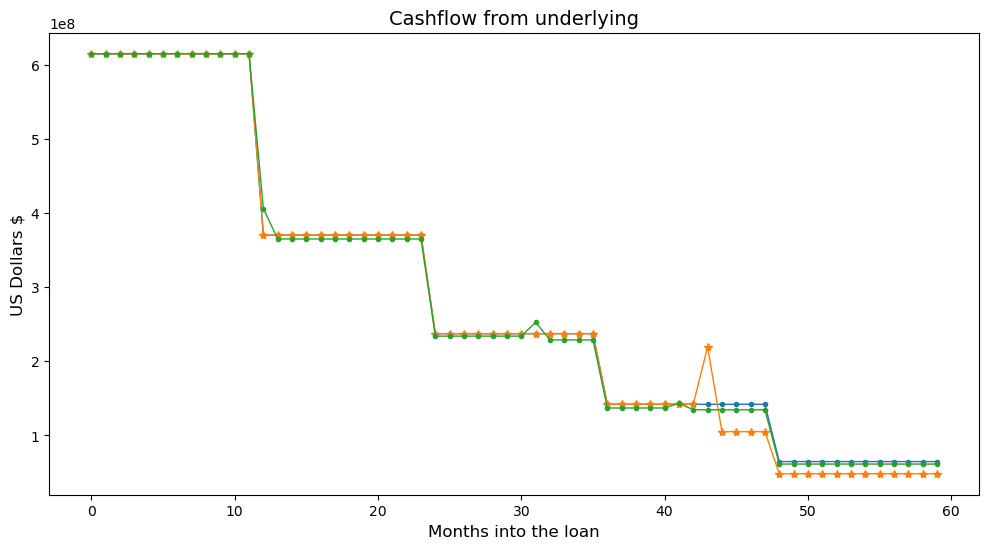

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(no_default_data, marker='.', linestyle='-', linewidth=1)
plt.plot(data_3_10, marker='*', linestyle='-', linewidth=1)
plt.plot(data_3_3, marker='.', linestyle='-', linewidth=1)
# Formatting
plt.xlabel('Months into the loan', fontsize=12)
plt.ylabel('US Dollars $', fontsize=12)
plt.title('Cashflow from underlying', fontsize=14)
plt.show()